<a href="https://colab.research.google.com/github/Moe-phantom/NEURO_SYMBOLIC_AI/blob/main/KaggleFakenewsData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("clmentbisaillon/fake-and-real-news-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fake-and-real-news-dataset' dataset.
Path to dataset files: /kaggle/input/fake-and-real-news-dataset


In [ ]:
!pip install "numpy<2.0" --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 127.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; pytho

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
print(os.listdir(path))
print("Path to dataset files:", path)

['True.csv', 'Fake.csv']
Path to dataset files: /kaggle/input/fake-and-real-news-dataset


In [ ]:
fake = pd.read_csv(path + "/Fake.csv")
true = pd.read_csv(path + "/True.csv")

In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake['subject'].value_counts()

,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


In [ ]:
txt = ''.join(fake['text'].tolist())

In [ ]:
wordcloud = WordCloud(width = 800, height = 800).generate(txt)

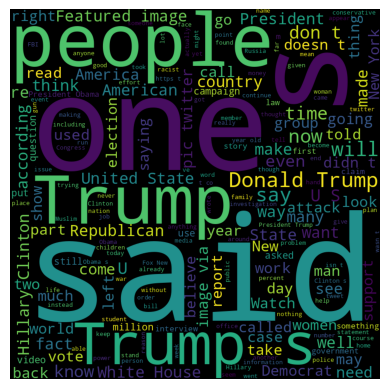

In [ ]:
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
true['subject'].value_counts()

,count
subject,
politicsNews,11272
worldnews,10145


In [ ]:
text = ''.join(true['text'].tolist())

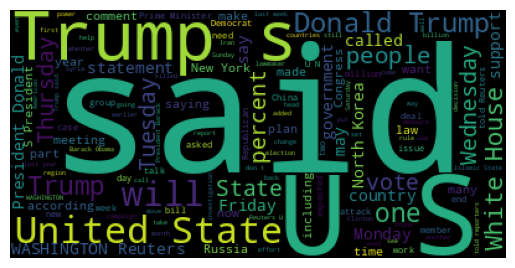

In [ ]:
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
true.sample(4)

,title,text,subject,date
14170,Escape from North Korea: video shows defector ...,SEOUL (Reuters) - A North Korean border guard ...,worldnews,"November 22, 2017"
9903,Milestones in the Supreme Court immigration case,(Reuters) - The U.S. Supreme Court on Monday w...,politicsNews,"April 17, 2016"
4725,Trump demands support in do-or-die Friday vote...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"March 23, 2017"
11567,Worries about Malaysia's 'Arabisation' grow as...,Kuala Lumpur (Reuters) - Malaysia s growing ti...,worldnews,"December 21, 2017"


In [ ]:
unkown = []
for i, row in enumerate(true['text']):
  try:
      record = row.split(' - ', maxsplit=1)
      record[1]
      assert (len(record[0])<260)
  except:
     unkown.append(i)



In [ ]:
len(unkown)

35

In [ ]:
true.iloc[unkown].text

,text
2922,The following statements were posted to the ve...
3488,The White House on Wednesday disclosed a group...
3782,The following statements were posted to the ve...
4358,"Neil Gorsuch, President Donald Trump’s appoint..."
4465,WASHINGTON The clock began running out this we...
5290,The following statements were posted to the ve...
5379,The following statements were posted to the ve...
5412,The following statements were posted to the ve...
5504,The following statements were posted to the ve...
5538,The following statements were posted to the ve...


In [ ]:
true = true.drop(8970, axis=0)

In [ ]:
true.iloc[unkown].text

,text
2922,The following statements were posted to the ve...
3488,The White House on Wednesday disclosed a group...
3782,The following statements were posted to the ve...
4358,"Neil Gorsuch, President Donald Trump’s appoint..."
4465,WASHINGTON The clock began running out this we...
5290,The following statements were posted to the ve...
5379,The following statements were posted to the ve...
5412,The following statements were posted to the ve...
5504,The following statements were posted to the ve...
5538,The following statements were posted to the ve...


In [ ]:
publisher = []
tmp_txt = []

# Make sure your 'unkown' list is actually populated from your previous step!
# If you re-ran cells out of order, 'unkown' might be empty.

for i, row in enumerate(true['text']):
    if i in unkown:
        # 1. Handle the "bad" rows
        tmp_txt.append(row)
        publisher.append('Unknown')

    else:
        # 2. Handle the "good" rows
        record = row.split(' - ', maxsplit=1)

        # Safety Check: Verify the split actually worked before grabbing index [1]
        if len(record) > 1:
            publisher.append(record[0].strip())  # Fix A: Add to publisher list (with ())
            tmp_txt.append(record[1].strip())    # Fix B: Add to text list (with ())
        else:
            # If split failed unexpectedly, treat as unknown
            tmp_txt.append(row)
            publisher.append('Unknown')

In [ ]:
true['publisher'] = publisher
true['text'] = tmp_txt

In [ ]:
true['publisher'].value_counts()

,count
publisher,
WASHINGTON (Reuters),6442
(Reuters),1481
NEW YORK (Reuters),726
LONDON (Reuters),707
MOSCOW (Reuters),624
...,...
"YANGON/SHAMLAPUR, Bangladesh (Reuters)",1
"VILLEJUIF, France (Reuters)",1
"BENGALURU, India (Reuters)",1


In [ ]:
true.shape

(21416, 5)

In [ ]:
empty_fake_i = [i for i,text in enumerate(fake['text'].tolist()) if str(text).strip()==""]

In [ ]:
fake.iloc[empty_fake_i]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
true['text'] = true['title'] + ' ' + true['text']
fake['text'] = fake['title'] + ' ' + fake['text']


In [ ]:
true['text'] = true['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

In [ ]:
true['class'] = 1
fake['class'] = 0

In [ ]:
true = true[['text', 'class']]
fake = fake[['text', 'class']]

In [ ]:
df = pd.concat([true, fake], ignore_index=True)

In [ ]:
df.sample(6)

,text,class
34770,wow! watch side by side comparison of hillary’...,0
10682,clinton picks up endorsement from senate minor...,1
15601,u.s. investigates reports of civilian casualti...,1
19517,iran regional behavior means nuclear deal not ...,1
39125,names revealed of top donor and popular actres...,0
41432,yikes! what the heck did hillary just cough up...,0


In [ ]:
!pip install spacy==3.7.6
!python -m spacy download en_core_web_sm==3.7.1
!pip install nltk==3.9.1
!pip install beautifulsoup4==3.2.2
!pip install textblob==0.18.0.post0

Reason for being yanked: Incorrect compatibility for transformer models
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.7/31.7 MB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.0/183.0 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.0/865.0 kB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 106.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.8 MB/s eta 0:00:00
  Attempting uninstall: blis
    Found existing installation: blis 1.3.3
    Uninstalling blis-1.3.3:
      Successfully uninstalled blis-1.3.3
  Attempting uninstall: thinc
    Found existing installation: thinc 8.3.10
    Uninstalling thinc-8.3.10:
      Successfully uninstalled thinc-8.3.10
  Attempting uninstall: spacy
    Found existing installation: spacy 3.8.11
    Uninstalling spacy-3.8.11:
      Successfully uninstalled spacy-3.8.11

✘ No c

In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-y3_iph77
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-y3_iph77
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 0f56a6502679f6750b7f0ffed98f590d1f0246bd
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess_kgptalkie: filename=preprocess_kgptalkie-0.11-py3-none-any.whl size=8174 sha256=20323c888f71972c6d746a4419f4881d5a5dda624290a7b210fcf1f164c77e03
  Stored in directory: /tmp/pip-ephem-wheel-cache-_uqmt9ts/wheels/24/f6/5f/6a2a2252acab6c8ce06a71a210d40e9b744871a9132dbf59bc
Successfully built preprocess_kgptalkie


In [ ]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 69.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=43fdb1371bef2018b7e926732c470329be62e1a96db9c6c75bffa68519341b41
  Stored in directory: /root/.cache/pip/wheels/95/0f/04/b17a72024b56a60e499ce1a6313d283ed5ba332407155bee03
Successfully built googletrans
  Attempting uninstall: hyperframe
    Found existing installation: hyperframe 6.1.0
    Uninstalling hyperfra

In [ ]:
import preprocess_kgptalkie as ps

/usr/local/lib/python3.12/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.8.0) was trained with spaCy v3.8.0 and may not be 100% compatible with the current version (3.7.6). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
ps.remove_special_chars('door$3')

'door3'

In [ ]:
df['text'] = df['text'].apply(lambda x: ps.remove_special_chars(x))

In [ ]:
#word2vector
!pip install gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 68.8 MB/s eta 0:00:00


In [ ]:
import gensim

In [ ]:
y = df['class'].values

In [ ]:
x = [d.split() for d in df ['text'].tolist()]

In [ ]:
type(x[0][0])

str

In [ ]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=x,window=10, min_count=1)

In [ ]:
len(w2v_model.wv)

230818

In [ ]:
w2v_model.wv['war']

array([ 4.770963  ,  0.38588464,  0.7007488 , -0.17587532, -1.7844223 ,
        0.7876515 ,  5.195434  ,  0.99182194,  4.0545945 ,  7.1074615 ,
        2.7404552 , -3.7496502 ,  1.6805071 ,  2.6999772 , -0.4886836 ,
        1.4549947 , -0.7022777 ,  1.2508868 , -0.6404486 ,  0.12822193,
        0.9909592 , -1.5717801 ,  0.28915042,  5.596366  , -0.6747214 ,
       -0.41302016,  3.9141526 , -5.551392  , -1.3015447 , -4.1745114 ,
        3.3970373 , -1.3002021 ,  3.2680502 ,  0.3615263 , -1.7355559 ,
        0.09337267, -0.7703602 ,  3.5642853 , -0.9755347 , -4.8689733 ,
       -2.3256915 ,  3.7575395 ,  3.7157285 ,  0.24452356, -6.389924  ,
        1.4642323 , -3.3758638 , -3.2799852 , -0.29118472, -0.59284824,
        2.867596  ,  1.0692724 ,  0.7583165 ,  0.77953184,  2.5207145 ,
        0.13888979,  4.4476895 ,  4.948072  , -2.532566  ,  0.3465536 ,
        1.4128367 , -1.8309064 , -4.914525  , -2.6308506 ,  8.676163  ,
        2.5811596 ,  4.7247415 , -1.035324  , -6.2087445 , -1.26

In [ ]:
w2v_model.wv.most_similar('sudan')

[('sudans', 0.7900107502937317),
 ('sudanese', 0.7813430428504944),
 ('africa', 0.6797765493392944),
 ('kivu', 0.6723728775978088),
 ('darfur', 0.6419544816017151),
 ('caucasus', 0.6328094005584717),
 ('suef', 0.6279862523078918),
 ('despotism', 0.6269440650939941),
 ('byeok', 0.619917094707489),
 ('carolinasentence', 0.6099650859832764)]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [ ]:
x = tokenizer.texts_to_sequences(x)

In [ ]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'of': 3,
 'a': 4,
 'and': 5,
 'in': 6,
 'that': 7,
 'on': 8,
 'for': 9,
 's': 10,
 'is': 11,
 'he': 12,
 'said': 13,
 'trump': 14,
 'it': 15,
 'with': 16,
 'was': 17,
 'as': 18,
 'his': 19,
 'by': 20,
 'has': 21,
 'be': 22,
 'have': 23,
 'not': 24,
 'from': 25,
 'this': 26,
 'at': 27,
 'are': 28,
 'who': 29,
 'us': 30,
 'an': 31,
 'they': 32,
 'i': 33,
 'but': 34,
 'we': 35,
 'would': 36,
 'president': 37,
 'about': 38,
 'will': 39,
 'their': 40,
 'had': 41,
 'you': 42,
 't': 43,
 'been': 44,
 'were': 45,
 'people': 46,
 'more': 47,
 'or': 48,
 'after': 49,
 'which': 50,
 'she': 51,
 'her': 52,
 'one': 53,
 'if': 54,
 'its': 55,
 'out': 56,
 'all': 57,
 'what': 58,
 'state': 59,
 'when': 60,
 'new': 61,
 'also': 62,
 'up': 63,
 'there': 64,
 'over': 65,
 'no': 66,
 'house': 67,
 'donald': 68,
 'our': 69,
 'states': 70,
 'clinton': 71,
 'obama': 72,
 'government': 73,
 'can': 74,
 'just': 75,
 'him': 76,
 'so': 77,
 'than': 78,
 'republican': 79,
 'other': 80,
 'so

In [ ]:
nos = np.array([len(h) for h in x ])
len(nos[nos>1000])

1583

In [ ]:
maxlen = 1000
x = pad_sequences(x, maxlen=maxlen)


In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [ ]:
def get_w_matrix(model):
  w_matrix = np.zeros((vocab_size, DIM))
  for word,i in vocab.items():
    w_matrix[i] = model.wv[word]
  return w_matrix

In [ ]:
embedding_vector = get_w_matrix(w2v_model)

In [ ]:
embedding_vector.shape

(230819, 100)

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vector], input_length=maxlen, trainable=False) )

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:

model.add(LSTM(128, return_sequences=False, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │    23,081,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,081,900 (88.05 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,081,900 (88.05 MB)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y)

In [ ]:
model.fit(X_train, y_train, validation_split = 0.3, epochs=10)

Epoch 1/10
737/737 ━━━━━━━━━━━━━━━━━━━━ 33s 40ms/step - accuracy: 0.8915 - loss: 0.2548 - val_accuracy: 0.9746 - val_loss: 0.0784
Epoch 2/10
737/737 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.9740 - loss: 0.0744 - val_accuracy: 0.9905 - val_loss: 0.0333
Epoch 3/10
737/737 ━━━━━━━━━━━━━━━━━━━━ 31s 42ms/step - accuracy: 0.9877 - loss: 0.0383 - val_accuracy: 0.9920 - val_loss: 0.0257
Epoch 4/10
737/737 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.9909 - loss: 0.0279 - val_accuracy: 0.9923 - val_loss: 0.0209
Epoch 5/10
737/737 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.9922 - loss: 0.0241 - val_accuracy: 0.9946 - val_loss: 0.0179
Epoch 6/10
737/737 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.9947 - loss: 0.0160 - val_accuracy: 0.9949 - val_loss: 0.0146
Epoch 7/10
737/737 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.9955 - loss: 0.0144 - val_accuracy: 0.9945 - val_loss: 0.0179
Epoch 8/10
737/737 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.9959 - loss: 0.0131 - 

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int")

351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step


In [ ]:
accuracy_score(y_test, y_pred)

0.9926057906458797

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5850
           1       0.99      0.99      0.99      5375

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
x = ['''KYIV, Ukraine (AP) — Ukrainian President Volodymyr Zelenskyy told his country in an address Friday that it could face a pivotal choice between standing up for its sovereign rights and preserving the American support it needs, as leaders discuss a U.S. peace proposal seen as favoring Russia.

Russian President Vladimir Putin, meanwhile, cautiously welcomed the U.S. plan to end Moscow’s nearly four-year war in Ukraine, which contains many of the Kremlin’s longstanding demands while offering limited security guarantees to Ukraine. Putin said it “could form the basis of a final peace settlement,” while accusing Ukraine of opposing the plan and being unrealistic.''']
x = tokenizer.texts_to_sequences(x)
x = pad_sequences(x, maxlen=maxlen)
x = np.array(x)


In [ ]:
model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


array([[0.99661714]], dtype=float32)

In [ ]:
(model.predict(x) > 0.5).astype("int") # array [1] == Real news / array [0] == Fake news

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[1]])